In [1]:
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)



In [2]:
df_cluster = pd.read_csv('C:\\Users\\p860n111\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [3]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct = df_cluster.copy(deep=True)
df_cluster_disct['TempGlobal_bins']=pd.cut(df_cluster_disct['TempGlobal'], 3,labels=["Low", "Medium", "High"])

In [4]:
df_cluster_disct.head(5)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low


In [5]:
#[(14.775, 15.204] = Low
# (15.204, 15.631] = Medium
# (15.631, 16.059]] = High

pd.cut(df_cluster_disct['TempGlobal'], 3).head()

0    (14.775, 15.204]
1    (14.775, 15.204]
2    (14.775, 15.204]
3    (14.775, 15.204]
4    (14.775, 15.204]
Name: TempGlobal, dtype: category
Categories (3, interval[float64]): [(14.775, 15.204] < (15.204, 15.631] < (15.631, 16.059]]

In [6]:
# Let's see how many examples we have of each species
df_cluster_disct["TempGlobal_bins"].value_counts()

Medium    55
Low       43
High      18
Name: TempGlobal_bins, dtype: int64

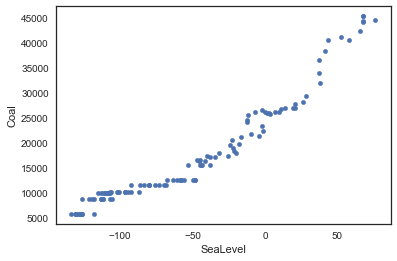

In [7]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
df_cluster_disct.plot(kind="scatter", x="SeaLevel", y="Coal")

C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


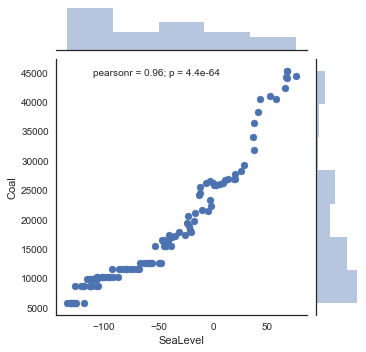

In [8]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SeaLevel", y="Coal", data=df_cluster_disct, size=5)

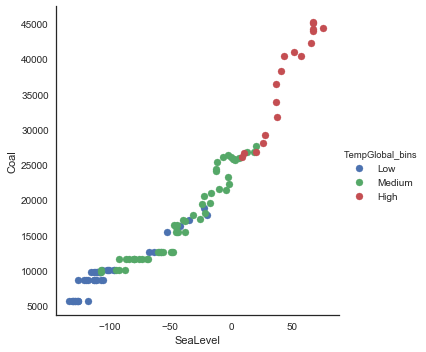

In [10]:
# One piece of information missing in the plots above is what bins (low,medium,high) each sample is
# We'll use seaborn's FacetGrid to color the scatterplot by TempGlobal_bins
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=5) \
   .map(plt.scatter, "SeaLevel", "Coal") \
   .add_legend()

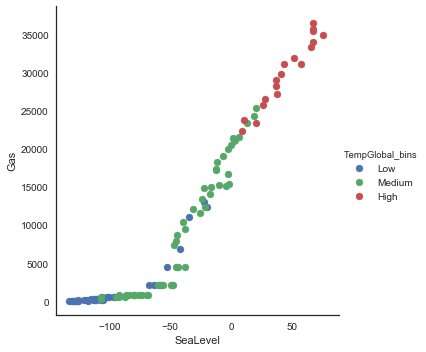

In [12]:
# We'll use seaborn's FacetGrid to color the scatterplot by TempGlobal_bins
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=5) \
   .map(plt.scatter, "SeaLevel", "Gas") \
   .add_legend()

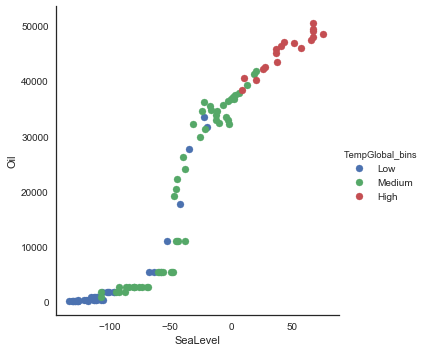

In [13]:
# We'll use seaborn's FacetGrid to color the scatterplot by TempGlobal_bins
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=5) \
   .map(plt.scatter, "SeaLevel", "Oil") \
   .add_legend()

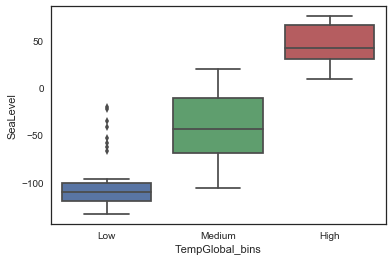

In [14]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="TempGlobal_bins", y="SeaLevel", data=df_cluster_disct)

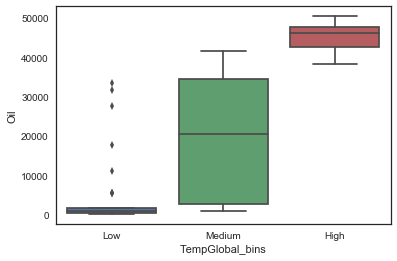

In [15]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="TempGlobal_bins", y="Oil", data=df_cluster_disct)

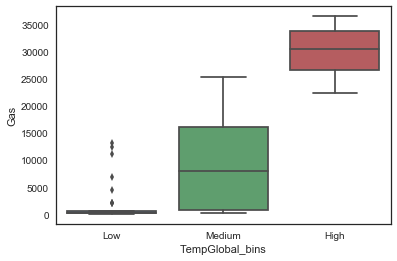

In [16]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="TempGlobal_bins", y="Gas", data=df_cluster_disct)

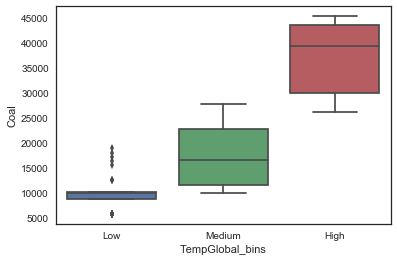

In [17]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="TempGlobal_bins", y="Coal", data=df_cluster_disct)

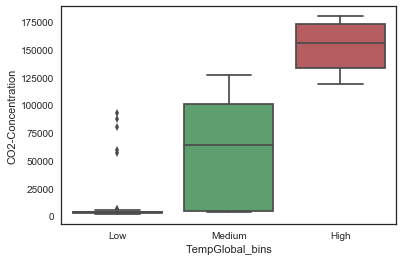

In [18]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="TempGlobal_bins", y="CO2-Concentration", data=df_cluster_disct)

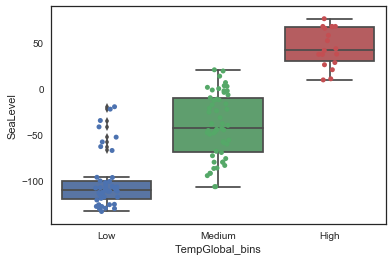

In [21]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="TempGlobal_bins", y="SeaLevel", data=df_cluster_disct)
ax = sns.stripplot(x="TempGlobal_bins", y="SeaLevel", data=df_cluster_disct, jitter=True, edgecolor="gray")

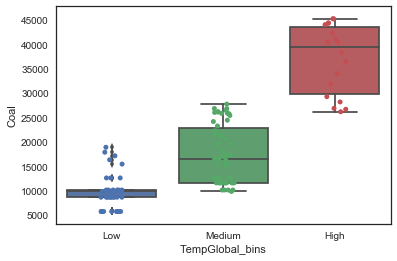

In [22]:
ax = sns.boxplot(x="TempGlobal_bins", y="Coal", data=df_cluster_disct)
ax = sns.stripplot(x="TempGlobal_bins", y="Coal", data=df_cluster_disct, jitter=True, edgecolor="gray")

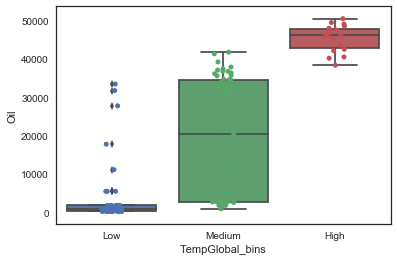

In [23]:
ax = sns.boxplot(x="TempGlobal_bins", y="Oil", data=df_cluster_disct)
ax = sns.stripplot(x="TempGlobal_bins", y="Oil", data=df_cluster_disct, jitter=True, edgecolor="gray")

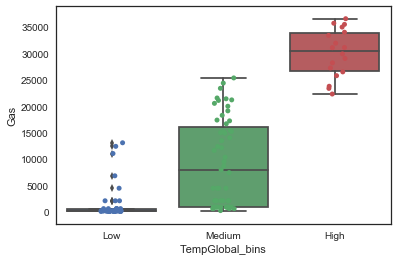

In [24]:
ax = sns.boxplot(x="TempGlobal_bins", y="Gas", data=df_cluster_disct)
ax = sns.stripplot(x="TempGlobal_bins", y="Gas", data=df_cluster_disct, jitter=True, edgecolor="gray")

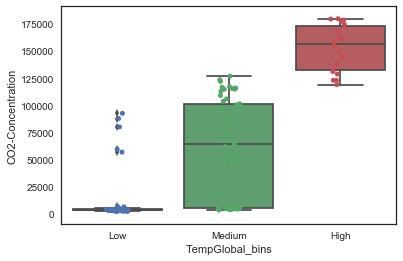

In [25]:
ax = sns.boxplot(x="TempGlobal_bins", y="CO2-Concentration", data=df_cluster_disct)
ax = sns.stripplot(x="TempGlobal_bins", y="CO2-Concentration", data=df_cluster_disct, jitter=True, edgecolor="gray")

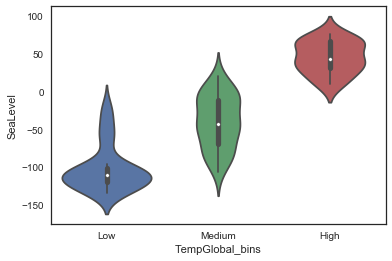

In [30]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="TempGlobal_bins", y="SeaLevel", data=df_cluster_disct, size=6)

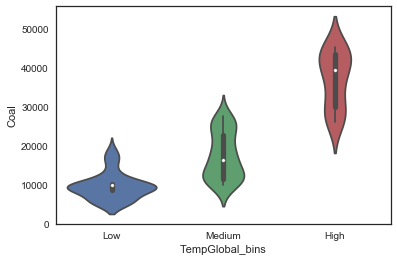

In [31]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="TempGlobal_bins", y="Coal", data=df_cluster_disct, size=6)

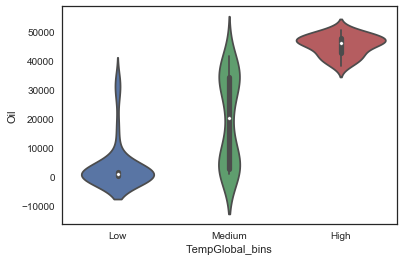

In [32]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="TempGlobal_bins", y="Oil", data=df_cluster_disct, size=6)

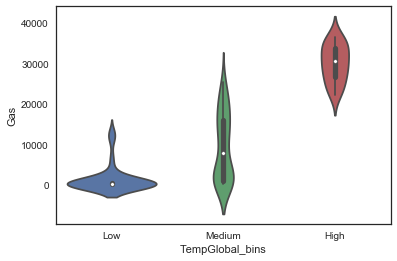

In [33]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="TempGlobal_bins", y="Gas", data=df_cluster_disct, size=6)

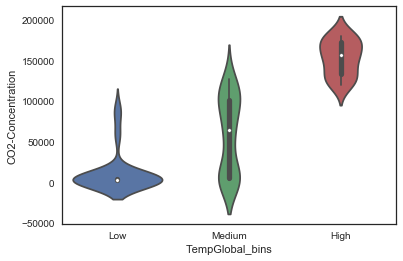

In [34]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="TempGlobal_bins", y="CO2-Concentration", data=df_cluster_disct, size=6)

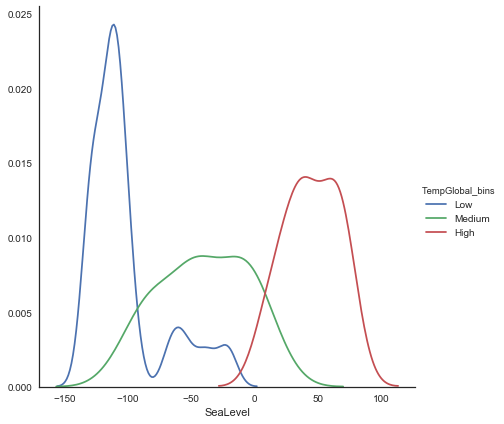

In [36]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=6) \
   .map(sns.kdeplot, "SeaLevel") \
   .add_legend()

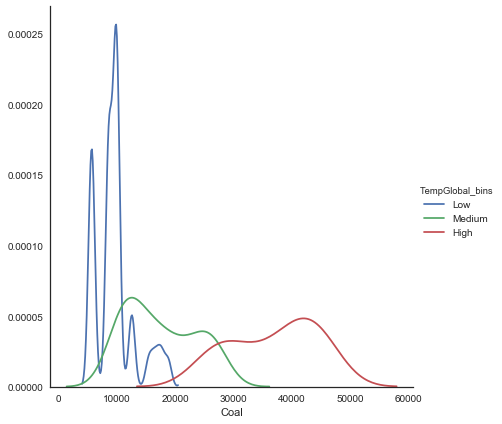

In [37]:
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=6) \
   .map(sns.kdeplot, "Coal") \
   .add_legend()

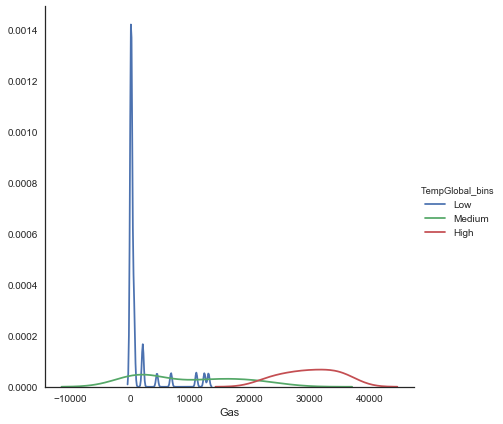

In [38]:
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=6) \
   .map(sns.kdeplot, "Gas") \
   .add_legend()

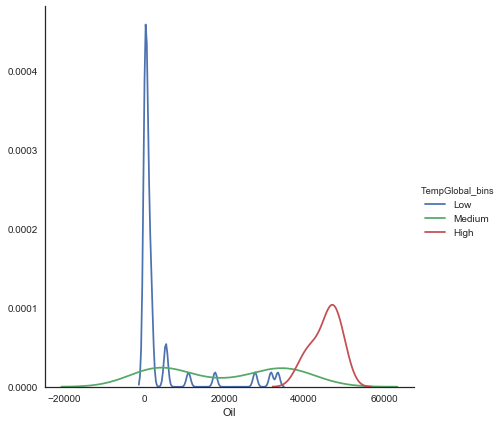

In [39]:
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=6) \
   .map(sns.kdeplot, "Oil") \
   .add_legend()

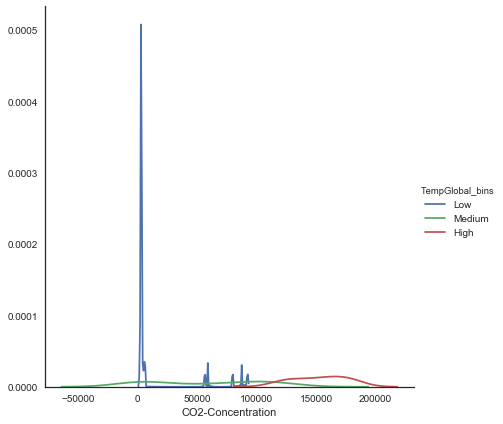

In [40]:
sns.FacetGrid(df_cluster_disct, hue="TempGlobal_bins", size=6) \
   .map(sns.kdeplot, "CO2-Concentration") \
   .add_legend()

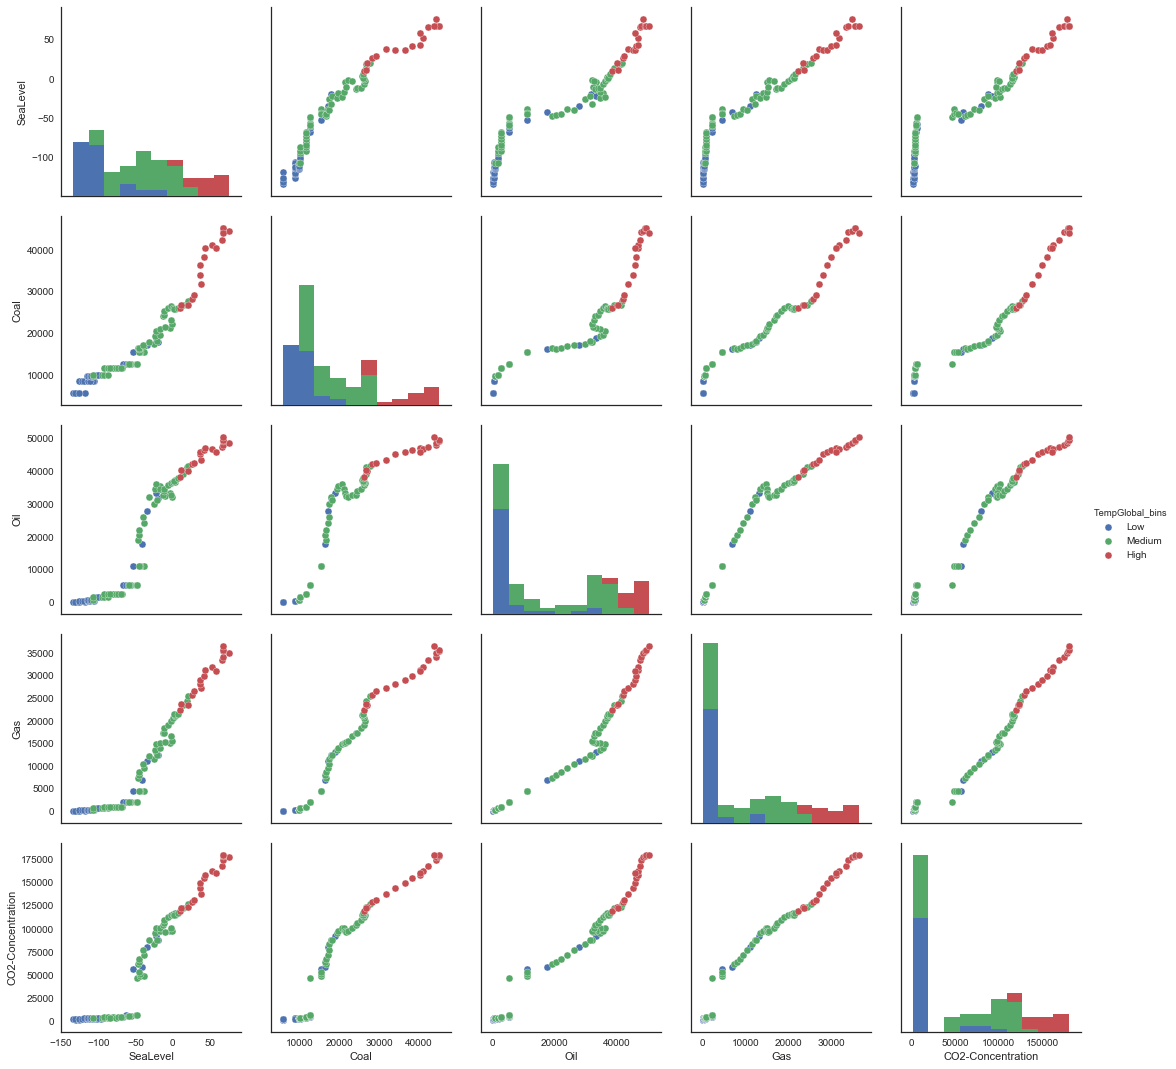

In [43]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df_cluster_disct.drop(["year","TempGlobal", "TempLand"], axis=1), hue="TempGlobal_bins", size=3)

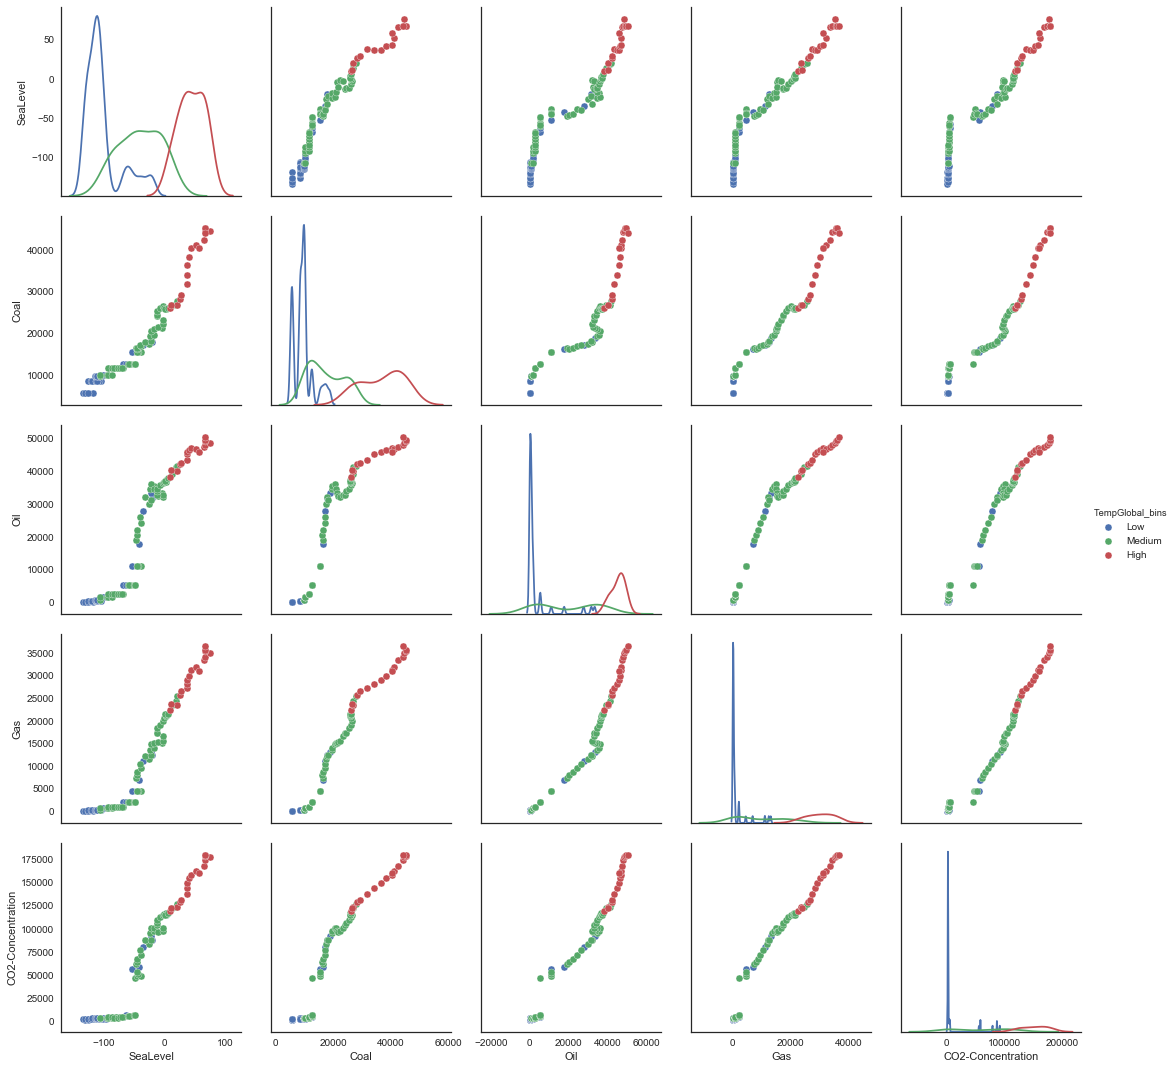

In [47]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df_cluster_disct.drop(["year","TempGlobal", "TempLand"], axis=1), hue="TempGlobal_bins", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FFE1751D0>,
      dtype=object)

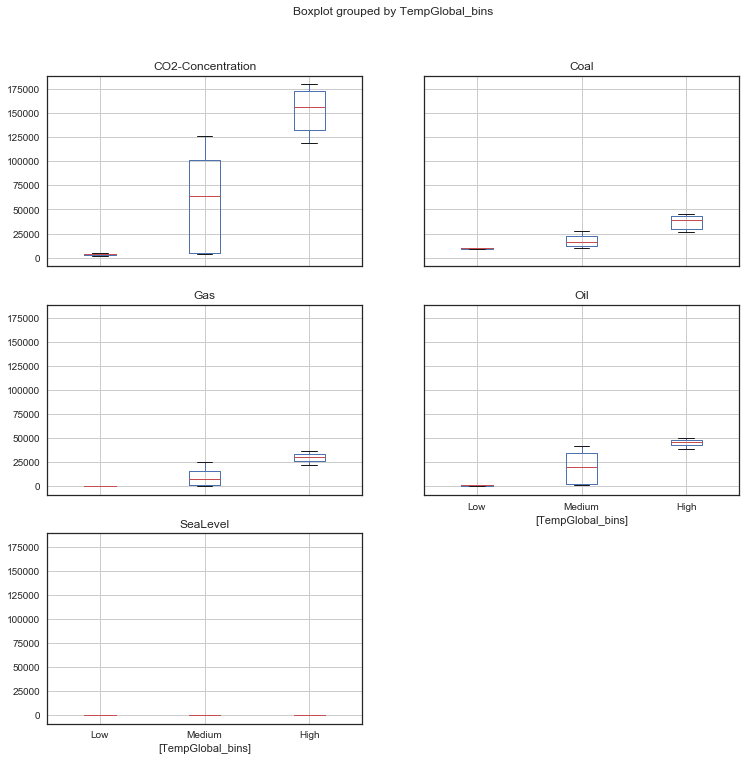

In [50]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
df_cluster_disct.drop(["year","TempGlobal", "TempLand"], axis=1).boxplot(by="TempGlobal_bins", figsize=(12, 12))

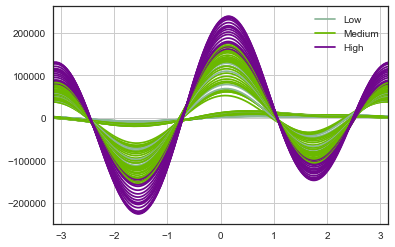

In [51]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(df_cluster_disct.drop(["year","TempGlobal", "TempLand"], axis=1), "TempGlobal_bins")

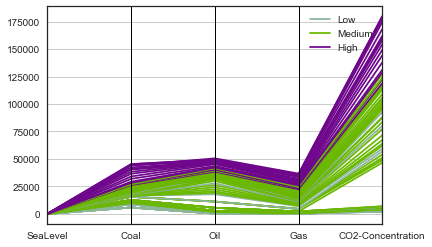

In [52]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df_cluster_disct.drop(["year","TempGlobal", "TempLand"], axis=1), "TempGlobal_bins")

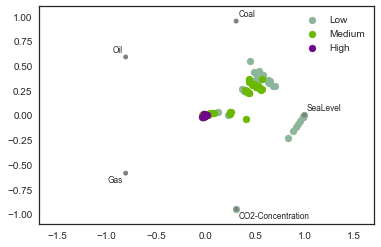

In [53]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(df_cluster_disct.drop(["year","TempGlobal", "TempLand"], axis=1), "TempGlobal_bins")